# Assignment 4



This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Santa Ana, California, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Santa Ana, California, United States** to Ann Arbor, USA. In that case at least one source file must be about **Santa Ana, California, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Santa Ana, California, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

### Ann Arbor, Michigan, United States Datasets

### Load the data into a dataframe from the csv file

In [2]:
# Ann Arbor, Michigan, United States

df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df = df.sort_values(["ID", "Date"])
print (df.shape)
df.head()

(165085, 4)


,ID,Date,Element,Data_Value
55067,USC00200032,2005-01-01,TMIN,-28
55102,USC00200032,2005-01-01,TMAX,67
112671,USC00200032,2005-01-02,TMAX,122
112708,USC00200032,2005-01-02,TMIN,-6
104159,USC00200032,2005-01-03,TMIN,11


### Data manipulation

In [3]:
# Dividing all temperature entries by 10 to convert them to degree celsius

df.loc[:,'Data_Value'] *= 0.1 

# extracting Year and Month-Day duo from the Date column

df['Year'] = df['Date'].apply(lambda x: (x[:4]))
df['Month-Day'] = df['Date'].apply(lambda x: (x[5:]))

# removing the rows correspondng to leap year i.e., 2-29

df = df[df['Month-Day'] != '02-29']

# extracting Month and Day columns 

df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = pd.DatetimeIndex(df['Date']).day 
df['Month'] = pd.DatetimeIndex(df['Date']).month 
df_new = df.copy()
df = df.set_index(['Month', 'Day'])
print (df.shape)
df.head()

(165002, 6)


ID       Date Element  Data_Value  Year Month-Day
Month Day                                                            
1     1    USC00200032 2005-01-01    TMIN        -2.8  2005     01-01
      1    USC00200032 2005-01-01    TMAX         6.7  2005     01-01
      2    USC00200032 2005-01-02    TMAX        12.2  2005     01-02
      2    USC00200032 2005-01-02    TMIN        -0.6  2005     01-02
      3    USC00200032 2005-01-03    TMIN         1.1  2005     01-03

### Data preporcessing for visualization

In [4]:
AA_low = (df.groupby(level= ['Month', 'Day'])['Data_Value'].agg({'Temp': np.min}))
print (AA_low.shape)
print (AA_low.head())

AA_high = (df.groupby(level= ['Month', 'Day'])['Data_Value'].agg({'Temp': np.max}))
print (AA_high.shape)
print (AA_high.head())

AA_avg = (df.groupby(level= ['Month', 'Day'])['Data_Value'].agg({'Temp': np.average}))
print (AA_avg.shape)
print (AA_avg.head())

# taking the temperatures into arrays for line plots

AA_low_data= np.array(AA_low['Temp'])
AA_high_data= np.array(AA_high['Temp'])
AA_avg_data= np.array(AA_avg['Temp'])

# data for x-ticks

df_sample = df_new.set_index(['Month-Day'])
month_day_list = df_new.index.unique()

(365, 1)
           Temp
Month Day      
1     1   -16.0
      2   -26.7
      3   -26.7
      4   -26.1
      5   -15.5
(365, 1)
           Temp
Month Day      
1     1    15.6
      2    13.9
      3    13.3
      4    10.6
      5    12.8
(365, 1)
               Temp
Month Day          
1     1   -1.263889
      2   -3.301316
      3   -4.901096
      4   -3.199780
      5   -2.373731


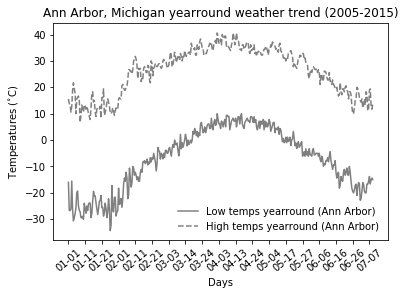

In [13]:
plt.plot(AA_low_data, '-', AA_high_data, '--', color = 'gray')

plt.ylabel('Temperatures $(^{\circ}$C)') # Set label for y-axis
plt.xlabel('Days')
plt.title("Ann Arbor, Michigan yearround weather trend (2005-2015)")
plt.legend(['Low temps yearround (Ann Arbor)', 'High temps yearround (Ann Arbor)'], frameon = False)

plt.xticks(range(0, len(month_day_list), 20), df_sample.index[range(0, len(df_sample), 20)], rotation = '40')

plt.show()

### Basel-City, Switzerland Datasets through (2005-2015)

Source: https://www.meteoblue.com/en/weather/week/basel_switzerland_2661604

### Load the data into a dataframe from the csv file

In [6]:
# Basel-City, Switzerland, 47.558 °N 7.573 °E, 279 m asl

df2 = pd.read_csv("history_export_2019-12-03T00_01_18.csv", skiprows = 9)
print (df2.shape)
df2.head()

(96409, 1)


,UTC_OFFSET;;;;;1;1;1;1
0,Year;Month;Day;Hour;Minute;Temperature [2 m a...
1,2005;01;01;00;00;3.22;NaN;6.84;202.40
2,2005;01;01;01;00;3.24;NaN;6.65;205.02
3,2005;01;01;02;00;3.26;NaN;6.10;209.69
4,2005;01;01;03;00;3.24;NaN;5.72;211.87


### Data manipulation

In [7]:
# cleaning the data a little bit!

df2[['V1','V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']] = df2['UTC_OFFSET;;;;;1;1;1;1'].str.split(';',expand=True)
df2 = df2[['V1', 'V2', 'V3', 'V6']]
df2.columns = df2.iloc[0]
df2 = df2.iloc[1:]

df2.rename(columns = {'Temperature  [2 m above gnd]': 'Temperature'}, inplace=True)
df2['Month-Day'] = df2['Month'].map(str) + '-' + df2['Day'].map(str)
df2['Date'] = pd.to_datetime(df2[['Month', 'Day', 'Year']])

# removing the rows correspondng to leap year i.e., 2-29

df2 = df2[df2['Month-Day'] != '02-29']

df2['Month'] = df2.Month.apply(pd.to_numeric, errors='coerce')
df2['Day'] = df2.Day.apply(pd.to_numeric, errors='coerce')
df2['Temperature'] = df2.Temperature.apply(pd.to_numeric, errors='coerce')
df2 = df2.set_index(['Month', 'Day'])
print (df2.shape)
df2.head()

(96360, 4)


0          Year  Temperature Month-Day       Date
Month Day                                        
1     1    2005         3.22     01-01 2005-01-01
      1    2005         3.24     01-01 2005-01-01
      1    2005         3.26     01-01 2005-01-01
      1    2005         3.24     01-01 2005-01-01
      1    2005         3.25     01-01 2005-01-01

### Data preporcessing for visualization

In [8]:
Basel_low = (df2.groupby(level= ['Month', 'Day'])['Temperature'].agg({'Temp': np.min}))
print (Basel_low.shape)
print (Basel_low.head())

Basel_high = (df2.groupby(level= ['Month', 'Day'])['Temperature'].agg({'Temp': np.max}))
print (Basel_high.shape)
print (Basel_high.head())

Basel_avg = (df2.groupby(level= ['Month', 'Day'])['Temperature'].agg({'Temp': np.average}))
print (Basel_avg.shape)
print (Basel_avg.head())

# taking the temperatures into arrays for line plots

Basel_low_data= np.array(Basel_low['Temp'])
Basel_high_data= np.array(Basel_high['Temp'])
Basel_avg_data= np.array(Basel_avg['Temp'])

# data for x-ticks

df3 = df2.set_index(['Month-Day'])
month_day_list = df3.index.unique()

(365, 1)
           Temp
Month Day      
1     1   -2.00
      2   -4.05
      3   -4.81
      4   -6.09
      5   -7.11
(365, 1)
            Temp
Month Day       
1     1    14.46
      2    11.86
      3    12.04
      4    11.13
      5    10.95
(365, 1)
               Temp
Month Day          
1     1    4.327045
      2    3.175530
      3    2.881326
      4    2.787614
      5    2.960985


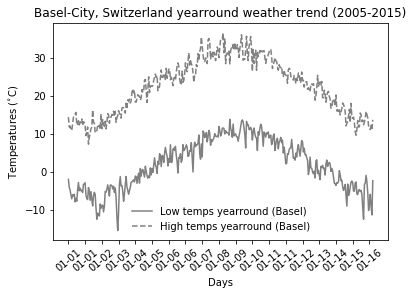

In [9]:
plt.plot(Basel_low_data, '-', Basel_high_data, '--', color = 'gray')

plt.ylabel('Temperatures $(^{\circ}$C)') # Set label for y-axis
plt.xlabel('Days')
plt.title("Basel-City, Switzerland yearround weather trend (2005-2015)")
plt.legend(['Low temps yearround (Basel)', 'High temps yearround (Basel)'], frameon = False)

plt.xticks(range(0, len(month_day_list), 20), df3.index[range(0, len(df3), 20)], rotation = '40')

plt.show()

### Visualization: Low and high temperatures in Ann Arbor and Basel throughout the year (from historic data through 2005-2015) 

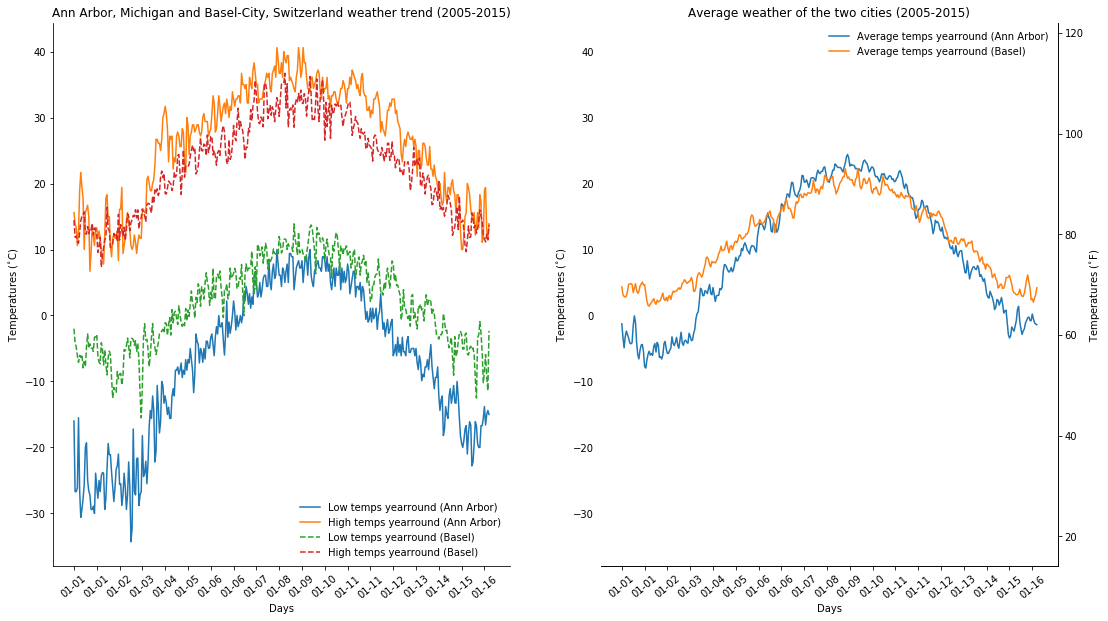

In [10]:
plt.figure(figsize = (18,10))

ax1 = plt.subplot(121)
plt.plot(AA_low_data, '-', AA_high_data, '-', Basel_low_data, '--', Basel_high_data, '--')
#ax1.yaxis.grid()

# Setting the labels

plt.ylabel('Temperatures $(^{\circ}$C)') # Set label for y-axis
plt.xlabel('Days')
plt.title("Ann Arbor, Michigan and Basel-City, Switzerland weather trend (2005-2015)")
plt.legend(['Low temps yearround (Ann Arbor)', 'High temps yearround (Ann Arbor)', 'Low temps yearround (Basel)', 'High temps yearround (Basel)'], \
           frameon = False)

# labelling ticks

plt.xticks(range(0, len(month_day_list), 20), df3.index[range(0, len(df3), 20)], rotation = '40')


# pass sharey=ax1 to ensure the two subplots share the same y axis

ax2 = plt.subplot(122, sharey=ax1, sharex = ax1)
plt.plot(AA_avg_data, '-', Basel_avg_data, '-')
#ax2.yaxis.grid()

# Setting the labels

plt.ylabel('Temperatures $(^{\circ}$C)') # Set label for y-axis
plt.xlabel('Days')
plt.title("Average weather of the two cities (2005-2015)")
plt.legend(['Average temps yearround (Ann Arbor)', 'Average temps yearround (Basel)'], \
           frameon = False)

# labelling ticks

plt.xticks(range(0, len(month_day_list), 20), df3.index[range(0, len(df3), 20)], rotation = '40')

# setting up farenhite scale

ax3 = ax2.twinx() # Create a twin y-axis sharing the x-axis with the previous y-axis
ax3.set_ylabel('Temperatures $(^{\circ}$F)') # Setting label for y-axis

ymin, ymax = -10, 50
def C_to_F(temp_c): # Celsius to Fahrenheit  
    return 9/5 * temp_c + 32
ax3.set_ylim(C_to_F(ymin), C_to_F(ymax)) # (ymin, ymax) are defined above

#fig.tight_layout() # To make the graph fit perfectly in the figure window

# removing the frame

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

## removing the spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

## removing the tick marks
ax2.tick_params(left="off")

plt.show()

### Alternative Approach

In [11]:
df_weather = pd.DataFrame({'Days':month_day_list, 'Low Temp AnnArbor':AA_low_data, 'High Temp AnnArbor':AA_high_data,\
                           'Low Temp Basel':Basel_low_data, 'High Temp Basel':Basel_high_data}).set_index('Days')


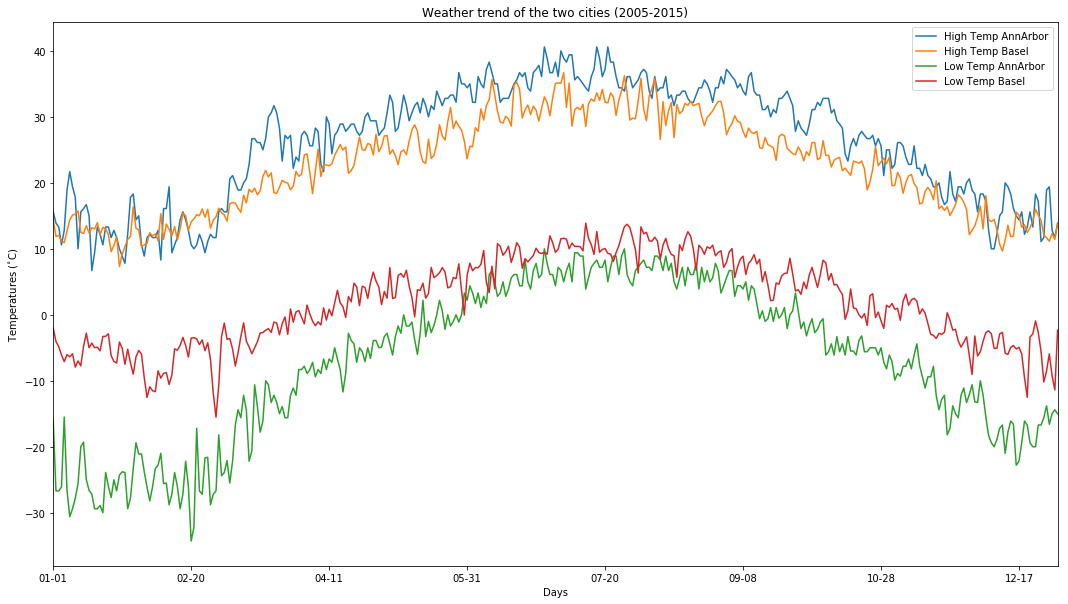

In [12]:
ax1 = df_weather.plot(figsize = (18,10))

plt.ylabel('Temperatures $(^{\circ}$C)') # Set label for y-axis
plt.xlabel('Days')
plt.title("Weather trend of the two cities (2005-2015)")

plt.show()